**Title:**

*Contributors: Tom Mitchell, Jason Liu, Kevin Zhang, Ethan Yen, Vijay Jayasuriya*

**1. Introduction:**

In this project, we will be looking at data from businesses in America. We will try to predict the stars based on select features. Specifically, we will train a machine learning model that can predict the stars.

**2. Data Collection**

In [1]:
import pandas as pd
import numpy as np
import ast
import json

**Converting JSON into a dataframe and csv**

In [2]:
# Filepath for the json version of the dataset
json_filepath = "yelp_academic_dataset_business.json"

# Reading the JSON file (weird since each line is a separate JSON object)
df = pd.read_json(json_filepath, lines=True)

# Normalizing the nested JSON parts and readding them as multiple columns
df_attributes = pd.json_normalize(df["attributes"])
df_hours = pd.json_normalize(df["hours"])
df = df.drop(["attributes", "hours"], axis=1)
df = pd.concat([df, df_attributes, df_hours], axis=1)

# Saving the dataframe to a csv file
df.to_csv("temp.csv")

**General Features of the Dataset**

Printing out the dimensions, attributes and their types, and first rows of the dataframe. The issues with the columns mentioned above can be seen here.

In [ ]:
print(df.shape)
print(df.dtypes)
df.head()

(100000, 58)
business_id                    object
name                           object
address                        object
city                           object
state                          object
postal_code                    object
latitude                      float64
longitude                     float64
stars                         float64
review_count                    int64
is_open                         int64
categories                     object
ByAppointmentOnly              object
BusinessAcceptsCreditCards     object
BikeParking                    object
RestaurantsPriceRange2         object
CoatCheck                      object
RestaurantsTakeOut             object
RestaurantsDelivery            object
Caters                         object
WiFi                           object
BusinessParking                object
WheelchairAccessible           object
HappyHour                      object
OutdoorSeating                 object
HasTV                          object

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-23:0,8:0-23:0,8:0-22:0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0


**3. Data Cleaning**

Let us clean the data by columns. the **is_open** column tells users if the location is closed permanently. We should only analyze the businesses that are still in operation.

In [3]:
df = df[df["is_open"] == 1]
df.drop("is_open", axis=1, inplace=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,NaN,NaN,NaN,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,NaN,NaN,NaN,0:0-0:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,12:0-18:0


After normalizing the **attributes** and **hours** features, the dataframe gained a significant number of columns (one for each possible attribute and one for each day of the week).

We'll handle the attribute columns first. Let's start with the **ByAppointmentOnly** column.

In [4]:
df["ByAppointmentOnly"].unique()

array([nan, 'False', 'True', 'None'], dtype=object)

We will assume all null values mean it is not by appointment only. This pattern of values is very common in this dataframe, so we will first look for columns with this pattern, and default missing values to False.

In [5]:
pattern = set(df["ByAppointmentOnly"].unique())
matching = []
for col_name in df.columns:
    if set(df[col_name].unique()).issubset(pattern):
        matching.append(col_name)

Now we will replace all null values with False.

In [6]:
mapping = {
    "False" : False,
    "None"  : False,
    "True"  : True
}
for col in matching:
    df[col] = df[col].map(mapping)
    df[col].fillna(False, inplace=True)

C:\Users\ethan\AppData\Local\Temp\ipykernel_12644\2334224800.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(False, inplace=True)
C:\Users\ethan\AppData\Local\Temp\ipykernel_12644\2334224800.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(False, inplace=True)
C:\Users\ethan

We proceed looking for problematic columns.

In [7]:
attribute_cols = df.columns[11:50]
remaining = [x for x in attribute_cols if x not in matching]
remaining

['RestaurantsPriceRange2',
 'WiFi',
 'BusinessParking',
 'Alcohol',
 'RestaurantsAttire',
 'Ambience',
 'NoiseLevel',
 'GoodForMeal',
 'Smoking',
 'Music',
 'BestNights',
 'BYOBCorkage',
 'HairSpecializesIn',
 'AgesAllowed',
 'DietaryRestrictions']

In [8]:
df["RestaurantsPriceRange2"].unique()

array([nan, '1', '2', '3', '4', 'None'], dtype=object)

This column tells us how expensive a restaurant is on a scale from 1-4. We are simply going to fill missing data with the average pricing.

In [9]:
price_mapping = {
    "1" : 1,
    "2" : 2,
    "3" : 3,
    "4" : 4
}

df["RestaurantsPriceRange2"] = df["RestaurantsPriceRange2"].map(price_mapping)
df["RestaurantsPriceRange2"].replace("None", np.nan, inplace=True)
mean = df["RestaurantsPriceRange2"].mean()
df["RestaurantsPriceRange2"].fillna(mean, inplace=True)

remaining.remove("RestaurantsPriceRange2")

C:\Users\ethan\AppData\Local\Temp\ipykernel_12644\1404852848.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RestaurantsPriceRange2"].replace("None", np.nan, inplace=True)
C:\Users\ethan\AppData\Local\Temp\ipykernel_12644\1404852848.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [10]:
df["WiFi"].unique()

array([nan, "u'free'", "u'no'", "'free'", "'no'", 'None', "u'paid'",
       "'paid'"], dtype=object)

Let's assume that null values for the **WiFi** column means the venue does not have wifi. Additionally, after research, the *"u"* entries were simply data entered when Yelp used Python 2. We will clean this to only have values of: none, free, paid. There are also *"None"* entries throughout, which we will replace with *"none"*. Additionally, this pattern runs for multiple columns.

In [11]:
def clean_entry(x):
    if isinstance(x, str):
        if (x.startswith("u'") and x.endswith("'")) or (x.startswith('u"') and x.endswith('"')):
            return x[2:-1]
        elif (x.startswith("'") and x.endswith("'")) or (x.startswith('"') and x.endswith('"')):
            return x[1:-1]
        elif x == "None":
            return "none"
    return x

pattern = ["WiFi", "Alcohol", "RestaurantsAttire", "NoiseLevel", "Smoking", "BYOBCorkage", "AgesAllowed"]

for col in pattern:
    df[col] = df[col].apply(clean_entry)
    df[col] = df[col].fillna("none")

rem = [x for x in remaining if x not in pattern]

In [12]:
df["BusinessParking"].unique()

array([nan,
       "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
       "{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}",
       'None',
       "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
       "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",
       "{'garage': None, 'street': False, 'validated': None, 'lot': True, 'valet': False}",
       "{u'valet': False, u'garage': None, u'street': True, u'lot': False, u'validated': None}",
       "{'garage': True, 'street': False, 'validated': False, 'lot': False, 'valet': False}",
       "{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}",
       "{'garage': False, 'street': True, 'validated': True, 'lot': True, 'valet': False}",
       "{u'valet': False, u'garage': False, u'street': False, u'lot': True, u'validated': False}",
       "{u'valet': False, u'gara

We will clean this by editing the data so that each entry only includes the type parking it has, and null values will be assumed to have zero parking. The rest of the columns follow this format, so we will clean them together.

In [13]:
def clean_boolean_keys(x):
    x = str(x)
    try:
        parsed = ast.literal_eval(x)
    except Exception:
        return "none"
    
    if not isinstance(parsed, dict):
        return "none"
    
    true_keys = [key for key, value in parsed.items() if value is True]
    return " ".join(true_keys) if true_keys else "none"

for col in rem:
    df[col] = df[col].apply(clean_boolean_keys)

df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,False,none,none,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,none,none,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,False,none,none,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,False,none,none,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,False,none,none,0:0-0:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,12:0-18:0


Now let us clean the hours columns. 

In [14]:
def format_time(time):
        hour, minute = time.split(':')
        return f"{int(hour):02d}:{int(minute):02d}"

def convert_hours(x):
    if pd.isna(x) or x == "0:0-0:0":
        return "none"
    
    open, close = x.split('-')
    
    return (format_time(open), format_time(close))

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for day in days:
    df[day] = df[day].apply(convert_hours)
     
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,False,none,none,none,"(08:00, 18:30)","(08:00, 18:30)","(08:00, 18:30)","(08:00, 18:30)","(08:00, 14:00)",none
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,none,none,"(07:00, 20:00)","(07:00, 20:00)","(07:00, 20:00)","(07:00, 20:00)","(07:00, 21:00)","(07:00, 21:00)","(07:00, 21:00)"
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,False,none,none,none,none,"(14:00, 22:00)","(16:00, 22:00)","(12:00, 22:00)","(12:00, 22:00)","(12:00, 18:00)"
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,False,none,none,none,"(06:00, 22:00)","(06:00, 22:00)","(06:00, 22:00)","(09:00, 00:00)","(09:00, 22:00)","(08:00, 22:00)"
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,False,none,none,none,"(10:00, 18:00)","(10:00, 18:00)","(10:00, 18:00)","(10:00, 18:00)","(10:00, 18:00)","(12:00, 18:00)"


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import pandas as pd

corr, p_value = stats.pearsonr(df['review_count'], df['stars'])

bins = [0, 10, 25, 50, 100, 250, 500, 1000, np.inf]
labels = ['0-10', '11-25', '26-50', '51-100', '101-250', '251-500', '501-1000', '1000+']
df['rc_bin'] = pd.cut(df['review_count'], bins=bins, labels=labels)

fig, plot = plt.subplots(figsize=(14, 8))

sns.boxplot(x='rc_bin', y='stars', data=df, ax=plot, palette='viridis')
plot.set_xlabel('Number of Reviews', fontsize=12)
plot.set_ylabel('Star Rating', fontsize=12)
plot.set_title('Distribution of Star Ratings by Review Counts', fontsize=14)

means = df.groupby('rc_bin')['stars'].mean()
for i, mean_val in enumerate(means):
    plot.scatter(i, mean_val, color='red', s=50, zorder=3)
    plot.annotate(f'{mean_val:.2f}', (i, mean_val), 
                xytext=(0, 5), textcoords='offset points', ha='center', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.8))

counts = df['rc_bin'].value_counts().sort_index()
for i, count in enumerate(counts):
    plot.annotate(f'n={count}', (i, df['stars'].min()), xytext=(0, -20), textcoords='offset points', ha='center', fontsize=8)

if p_value < 0.05:
    correlation = "Significant correlation (p < 0.05)"
else:
    correlation = "No significant correlation (p ≥ 0.05)"

fig.text(0.5, 0.01, 
         f"Correlation: r={corr:.3f}, p-value={p_value:.6f}\n" + f"{correlation}", 
         ha='center', fontsize=12,
         bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

plt.tight_layout(rect=[0, 0.05, 1, 1]) 
plt.show()

print(f"Correlation coefficient: {corr:.3f}")
print(f"p-value: {p_value:.6f}")
print(f"Interpretation: {correlation}")

ModuleNotFoundError: No module named 'seaborn'

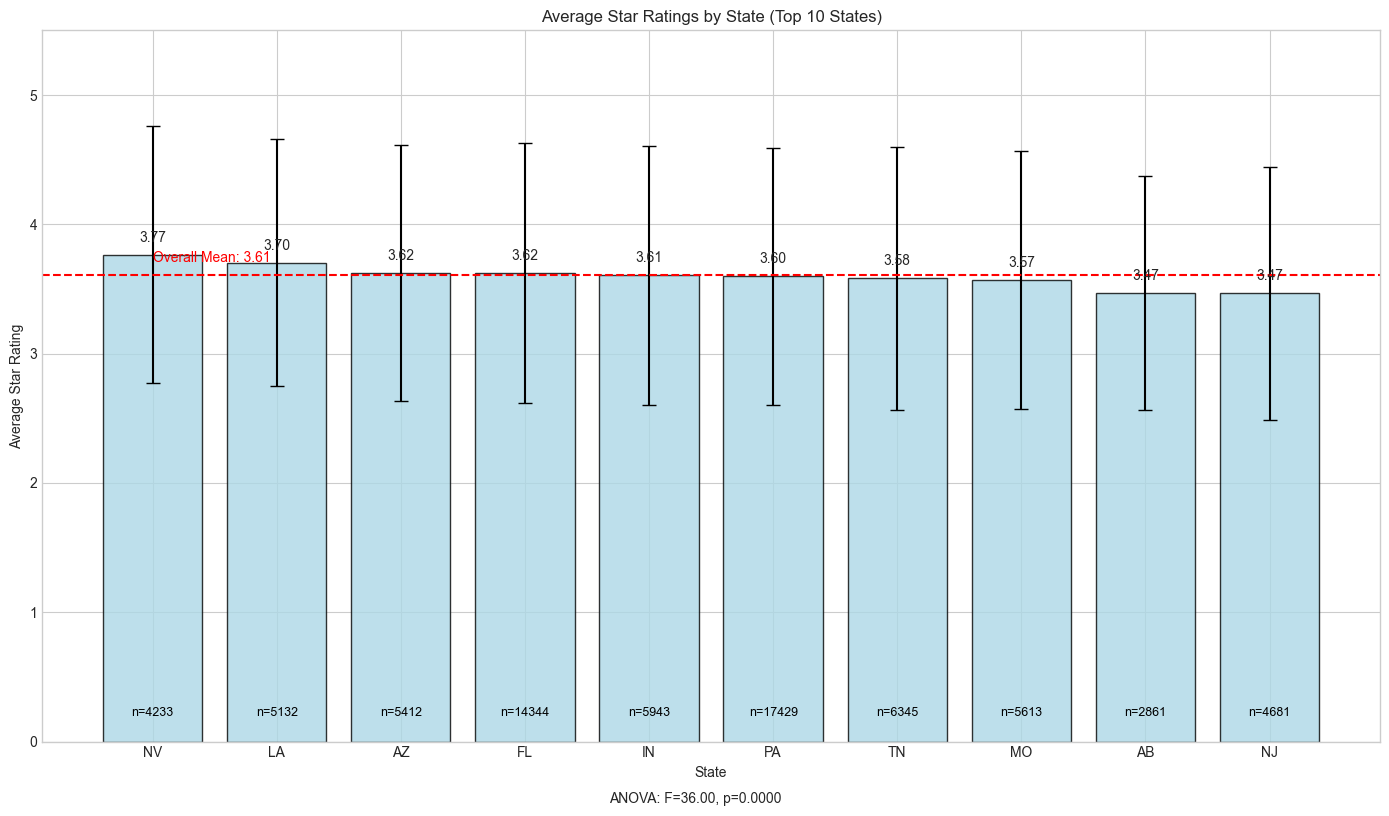

ANOVA F-statistic: 35.995
p-value: 0.000000
There are significant differences between states

Tukey's HSD Post-hoc Test:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    AB     AZ   0.1537    0.0  0.0812  0.2262   True
    AB     FL   0.1526    0.0  0.0884  0.2169   True
    AB     IN   0.1351    0.0  0.0637  0.2065   True
    AB     LA   0.2343    0.0  0.1611  0.3075   True
    AB     MO   0.1012 0.0004  0.0292  0.1733   True
    AB     NJ  -0.0039    1.0 -0.0784  0.0705  False
    AB     NV   0.2955    0.0  0.2196  0.3714   True
    AB     PA    0.129    0.0  0.0657  0.1923   True
    AB     TN   0.1129    0.0  0.0423  0.1836   True
    AZ     FL  -0.0011    1.0 -0.0511   0.049  False
    AZ     IN  -0.0186 0.9925 -0.0775  0.0404  False
    AZ     LA   0.0806 0.0012  0.0195  0.1417   True
    AZ     MO  -0.0525 0.1443 -0.1122  0.0073  False
    AZ     NJ  -0.1576    0.0 -

In [ ]:
top_states = df['state'].value_counts().head(10).index.tolist()
df_ts = df[df['state'].isin(top_states)]


state_stats = df_ts.groupby('state')['stars'].agg(['mean', 'std', 'count']).reset_index()
state_stats = state_stats.sort_values('mean', ascending=False)

groups = [df_ts[df_ts['state'] == state]['stars'] for state in top_states]
f_stat, p_value = stats.f_oneway(*groups)

fig, ax = plt.subplots(figsize=(14, 8))

bars = ax.bar(
    state_stats['state'], 
    state_stats['mean'], 
    yerr=state_stats['std'], 
    capsize=5, 
    color='lightblue', 
    alpha=0.8,
    edgecolor='black'
)

for i, bar in enumerate(bars):
    height = bar.get_height()
    count = state_stats['count'].iloc[i]
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height + 0.1, 
        f'{height:.2f}',
        ha='center', 
        fontsize=10
    )
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        0.2, 
        f'n={count}',
        ha='center', 
        fontsize=9,
        color='black'
    )

ax.set_xlabel('State')
ax.set_ylabel('Average Star Rating')
ax.set_title('Average Star Ratings by State (Top 10 States)')
ax.set_ylim(0, 5.5)
ax.grid(True)

total_mean = df_ts['stars'].mean()
ax.axhline(y=total_mean, color='red', linestyle='--')
ax.text(0, total_mean+0.1, f'Overall Mean: {total_mean:.2f}', color='red')

result_text = f"ANOVA: F={f_stat:.2f}, p={p_value:.4f}"
plt.figtext(0.5, -0.01, result_text, ha='center')

plt.tight_layout()
plt.show()

print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    result_text += "\nSignificant differences between states (p < 0.05)"
    print("There are significant differences between states")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    
    tukey_data = []
    for state, group in zip(top_states, groups):
        for value in group:
            tukey_data.append([state, value])
    
    tukey_df = pd.DataFrame(tukey_data, columns=['state', 'stars'])
    
    tukey_result = pairwise_tukeyhsd(tukey_df['stars'], tukey_df['state'], alpha=0.05)
    
    print("\nTukey's HSD Post-hoc Test:")
    print(tukey_result)
else:
    result_text += "\nNo significant differences between states (p >= 0.05)"
    


Number of restaurants: 23271
Price ranges: [1.         1.76885663 2.         3.         4.        ]
Alcohol options: ['none' 'full_bar' 'beer_and_wine']


<Figure size 1600x800 with 0 Axes>

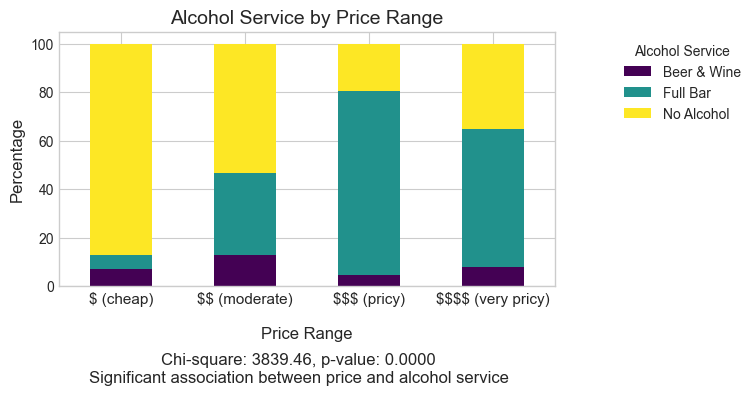

Chi-square: 3839.461
p-value: 0.000000
Degrees of freedom: 6

Contingency Table (Count):
AlcoholService         Beer & Wine  Full Bar  No Alcohol
PriceCategory                                           
$ (cheap)                      651       514        7892
$$ (moderate)                 1708      4605        7233
$$$ (expensive)                 27       448         116
$$$$ (very expensive)            6        44          27


In [ ]:
restaurants = df[df['categories'].str.contains('Restaurant', na=False)]

restaurants = restaurants.dropna(subset=['RestaurantsPriceRange2', 'Alcohol'])
        
print(f"Number of restaurants: {len(restaurants)}")
print(f"Price ranges: {restaurants['RestaurantsPriceRange2'].unique()}")
print(f"Alcohol options: {restaurants['Alcohol'].unique()}")
        
restaurants['PriceCategory'] = pd.cut(
    restaurants['RestaurantsPriceRange2'], 
    bins=[0, 1.5, 2.5, 3.5, 4.5],
    labels=['$ (cheap)', '$$ (moderate)', '$$$ (expensive)', '$$$$ (very expensive)']
)

alcohol_map = {
    'none': 'No Alcohol',
    'full_bar': 'Full Bar', 
    'beer_and_wine': 'Beer & Wine'
}
restaurants['AlcoholService'] = restaurants['Alcohol'].map(alcohol_map)
        
restaurants = restaurants.dropna(subset=['PriceCategory', 'AlcoholService'])
        
cont = pd.crosstab(restaurants['PriceCategory'], restaurants['AlcoholService'])
            
chi2, p_value, dof, expected = stats.chi2_contingency(cont)
            
plt.figure(figsize=(16, 8))
            
cont_pct = cont.div(cont.sum(axis=1), axis=0) * 100
ax = cont_pct.plot(kind='bar', stacked=True, colormap='viridis')
            
plt.xlabel('Price Range', fontsize=12, labelpad=15)
plt.ylabel('Percentage', fontsize=12)
plt.title('Alcohol Service by Price Range', fontsize=14)
            
plt.legend(title='Alcohol Service', loc='upper right', bbox_to_anchor=(1.4, 1.0))
            
price_labels = ['\$ (cheap)', '\$\$ (moderate)', '\$\$\$ (pricy)', '\$\$\$\$ (very pricy)']
plt.xticks(range(len(cont_pct.index)), price_labels, rotation=0, fontsize=11)
            
plt.gca().set_xticklabels(price_labels, ha='center')
            
plt.subplots_adjust(bottom=0.35)
            
res = f"Chi-square: {chi2:.2f}, p-value: {p_value:.4f}"
if p_value < 0.05:
    res += "\nSignificant association between price and alcohol service"
else:
    res += "\nNo significant association between price and alcohol service"
            
plt.figtext(0.5, 0.15, res, ha='center', fontsize=12)
plt.show()
            
print(f"Chi-square: {chi2:.3f}")
print(f"p-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")
print("\nContingency Table (Count):")
print(cont)

In [18]:
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'categories',
       'ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking',
       'RestaurantsPriceRange2', 'CoatCheck', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 'Caters', 'WiFi', 'BusinessParking',
       'WheelchairAccessible', 'HappyHour', 'OutdoorSeating', 'HasTV',
       'RestaurantsReservations', 'DogsAllowed', 'Alcohol', 'GoodForKids',
       'RestaurantsAttire', 'Ambience', 'RestaurantsTableService',
       'RestaurantsGoodForGroups', 'DriveThru', 'NoiseLevel', 'GoodForMeal',
       'BusinessAcceptsBitcoin', 'Smoking', 'Music', 'GoodForDancing',
       'AcceptsInsurance', 'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage',
       'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService',
       'AgesAllowed', 'DietaryRestrictions', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dty

In [19]:
df.dtypes

business_id                    object
name                           object
address                        object
city                           object
state                          object
postal_code                    object
latitude                      float64
longitude                     float64
stars                         float64
review_count                    int64
categories                     object
ByAppointmentOnly                bool
BusinessAcceptsCreditCards       bool
BikeParking                      bool
RestaurantsPriceRange2        float64
CoatCheck                        bool
RestaurantsTakeOut               bool
RestaurantsDelivery              bool
Caters                           bool
WiFi                           object
BusinessParking                object
WheelchairAccessible             bool
HappyHour                        bool
OutdoorSeating                   bool
HasTV                            bool
RestaurantsReservations          bool
DogsAllowed 

In [21]:
df.value_counts()

business_id             name                            address                                 city             state  postal_code  latitude   longitude   stars  review_count  categories                                                                                                              ByAppointmentOnly  BusinessAcceptsCreditCards  BikeParking  RestaurantsPriceRange2  CoatCheck  RestaurantsTakeOut  RestaurantsDelivery  Caters  WiFi  BusinessParking  WheelchairAccessible  HappyHour  OutdoorSeating  HasTV  RestaurantsReservations  DogsAllowed  Alcohol  GoodForKids  RestaurantsAttire  Ambience  RestaurantsTableService  RestaurantsGoodForGroups  DriveThru  NoiseLevel  GoodForMeal  BusinessAcceptsBitcoin  Smoking  Music  GoodForDancing  AcceptsInsurance  BestNights  BYOB   Corkage  BYOBCorkage  HairSpecializesIn  Open24Hours  RestaurantsCounterService  AgesAllowed  DietaryRestrictions  Monday          Tuesday         Wednesday       Thursday        Friday          Saturday        

**Data Analysis**

**Results and Visualizations**

**Insights and Conclusions**